# Digitalization Impact on Small Businesses  
## Data Analysis and Machine Learning Project

This project analyzes how digital tools such as UPI payments, online marketplaces,
and digital record keeping affect the growth of small businesses.

The objective is to determine whether digitalization leads to business growth
using survey data and machine learning models.


## Objective of the Study

The main objective of this project is to analyze the impact of digitalization
on small businesses and determine whether the use of digital tools contributes
to business growth.

We use survey data collected from local businesses across multiple cities
to study the relationship between digital adoption and business performance.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description

The dataset consists of survey responses collected from small business owners.
It includes information about:

- Use of smartphones and internet for business
- Adoption of UPI and online payments
- Use of online marketplaces
- Digital record keeping and messaging
- Challenges in using digital tools
- Business growth indicators

Each response represents one business.


In [28]:
df = pd.read_excel("jharkhand.xlsx")
df.head()


,Location,Shop / Owner / Business Name,Uses Smartphone for Business (1-5),Uses Internet for Communication (1-5),Accepts UPI / Mobile Payments,Uses Online Marketplace,Finds Digital Tools Difficult (1-5),Digital Payments Increased Customers (1-5),Digital Payments Reduce Cash Loss (1-5),Transaction Fees Are Burden (1-5),Bookkeeping Easier with Digital (1-5),Digital Tools Increased Sales & Reach (1-5),Digital Messaging Improves Repeat Customers (1-5),Spends on Digital Services (1-5),Digital Records Help Stock Management (1-5),Fear of Fraud in Digital Payments (1-5),Lost Money in Digital Transactions (1-5),Plans to Use More Digital Tools (1-5)
0,"Chakradharpur, Jharkhand",A1 Lady's Corner,5,2,1,0,2,4,4,3,4,4,5,4,3,4,2,5
1,"Chakradharpur, Jharkhand",Soni (Golgappa stall),5,5,1,1,5,3,4,3,3,3,5,3,1,2,2,3
2,"Chakradharpur, Jharkhand",Binay (small shop),5,3,1,0,3,3,3,5,3,2,5,3,2,3,2,3
3,"Chakradharpur, Jharkhand","Owner - Mangal , Business name - Hair Saloon",5,4,1,0,3,5,4,3,5,4,5,5,5,3,2,5
4,"Chakradharpur, Jharkhand",Vinay (Golgappa stall),5,4,1,0,3,3,4,4,3,3,4,2,2,4,2,3


In [29]:
df.isnull().sum()


Location                                             0
Shop / Owner / Business Name                         0
Uses Smartphone for Business (1-5)                   0
Uses Internet for Communication (1-5)                0
Accepts UPI / Mobile Payments                        0
Uses Online Marketplace                              0
Finds Digital Tools Difficult (1-5)                  0
Digital Payments Increased Customers (1-5)           0
Digital Payments Reduce Cash Loss (1-5)              0
Transaction Fees Are Burden (1-5)                    0
Bookkeeping Easier with Digital (1-5)                0
Digital Tools Increased Sales & Reach (1-5)          0
Digital Messaging Improves Repeat Customers (1-5)    0
Spends on Digital Services (1-5)                     0
Digital Records Help Stock Management (1-5)          0
Fear of Fraud in Digital Payments (1-5)              0
Lost Money in Digital Transactions (1-5)             0
Plans to Use More Digital Tools (1-5)                0
dtype: int

## Data Preprocessing

In this step, the dataset is cleaned and prepared for analysis.

- Removed unnecessary columns (shop name)
- Encoded categorical variables (location)
- Converted survey responses into numeric format
- Created target variable 'Growth' based on sales increase

This ensures the dataset is ready for analysis and machine learning.


In [30]:
df = df.drop(columns=["Shop / Owner / Business Name"])


In [31]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Location                                           193 non-null    str  
 1   Uses Smartphone for Business (1-5)                 193 non-null    int64
 2   Uses Internet for Communication (1-5)              193 non-null    int64
 3   Accepts UPI / Mobile Payments                      193 non-null    int64
 4   Uses Online Marketplace                            193 non-null    int64
 5   Finds Digital Tools Difficult (1-5)                193 non-null    int64
 6   Digital Payments Increased Customers (1-5)         193 non-null    int64
 7   Digital Payments Reduce Cash Loss (1-5)            193 non-null    int64
 8   Transaction Fees Are Burden (1-5)                  193 non-null    int64
 9   Bookkeeping Easier with Digital (1-5)      

In [32]:
df["Growth"] = df["Digital Tools Increased Sales & Reach (1-5)"].apply(lambda x: 1 if x>=4 else 0)


In [33]:
df["Growth"].value_counts()


Growth
1    99
0    94
Name: count, dtype: int64

In [34]:
df = df.drop(columns=["Digital Tools Increased Sales & Reach (1-5)"])


In [35]:
df.head()

,Location,Uses Smartphone for Business (1-5),Uses Internet for Communication (1-5),Accepts UPI / Mobile Payments,Uses Online Marketplace,Finds Digital Tools Difficult (1-5),Digital Payments Increased Customers (1-5),Digital Payments Reduce Cash Loss (1-5),Transaction Fees Are Burden (1-5),Bookkeeping Easier with Digital (1-5),Digital Messaging Improves Repeat Customers (1-5),Spends on Digital Services (1-5),Digital Records Help Stock Management (1-5),Fear of Fraud in Digital Payments (1-5),Lost Money in Digital Transactions (1-5),Plans to Use More Digital Tools (1-5),Growth
0,"Chakradharpur, Jharkhand",5,2,1,0,2,4,4,3,4,5,4,3,4,2,5,1
1,"Chakradharpur, Jharkhand",5,5,1,1,5,3,4,3,3,5,3,1,2,2,3,0
2,"Chakradharpur, Jharkhand",5,3,1,0,3,3,3,5,3,5,3,2,3,2,3,0
3,"Chakradharpur, Jharkhand",5,4,1,0,3,5,4,3,5,5,5,5,3,2,5,1
4,"Chakradharpur, Jharkhand",5,4,1,0,3,3,4,4,3,4,2,2,4,2,3,0


In [36]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)


In [37]:
df.head()


,Uses Smartphone for Business (1-5),Uses Internet for Communication (1-5),Accepts UPI / Mobile Payments,Uses Online Marketplace,Finds Digital Tools Difficult (1-5),Digital Payments Increased Customers (1-5),Digital Payments Reduce Cash Loss (1-5),Transaction Fees Are Burden (1-5),Bookkeeping Easier with Digital (1-5),Digital Messaging Improves Repeat Customers (1-5),Spends on Digital Services (1-5),Digital Records Help Stock Management (1-5),Fear of Fraud in Digital Payments (1-5),Lost Money in Digital Transactions (1-5),Plans to Use More Digital Tools (1-5),Growth,"Location_Jamshedpur, Jharkhand","Location_Ranchi,Jharkhand"
0,5,2,1,0,2,4,4,3,4,5,4,3,4,2,5,1,False,False
1,5,5,1,1,5,3,4,3,3,5,3,1,2,2,3,0,False,False
2,5,3,1,0,3,3,3,5,3,5,3,2,3,2,3,0,False,False
3,5,4,1,0,3,5,4,3,5,5,5,5,3,2,5,1,False,False
4,5,4,1,0,3,3,4,4,3,4,2,2,4,2,3,0,False,False


# Exploratory Data Analysis (EDA)

In this section, we analyze the dataset to understand patterns,
relationships between digital adoption and business growth,
and identify important features before applying machine learning models.


In [38]:
df.describe()


,Uses Smartphone for Business (1-5),Uses Internet for Communication (1-5),Accepts UPI / Mobile Payments,Uses Online Marketplace,Finds Digital Tools Difficult (1-5),Digital Payments Increased Customers (1-5),Digital Payments Reduce Cash Loss (1-5),Transaction Fees Are Burden (1-5),Bookkeeping Easier with Digital (1-5),Digital Messaging Improves Repeat Customers (1-5),Spends on Digital Services (1-5),Digital Records Help Stock Management (1-5),Fear of Fraud in Digital Payments (1-5),Lost Money in Digital Transactions (1-5),Plans to Use More Digital Tools (1-5),Growth
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,3.943005,3.290155,0.870466,0.248705,2.445596,3.497409,3.430052,3.310881,3.523316,3.538860,3.481865,3.082902,3.005181,1.927461,4.056995,0.512953
std,0.979937,1.163130,0.336663,0.433386,1.345670,1.150744,1.197449,0.928000,1.207928,1.140994,1.254547,1.234642,0.960129,0.633215,0.908218,0.501132
min,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,3.000000,3.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,4.000000,3.000000,1.000000,0.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,1.000000
75%,5.000000,4.000000,1.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,2.000000,5.000000,1.000000
max,5.000000,5.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,1.000000


## Growth Distribution Analysis
This graph shows how many businesses experienced growth due to digitalization.


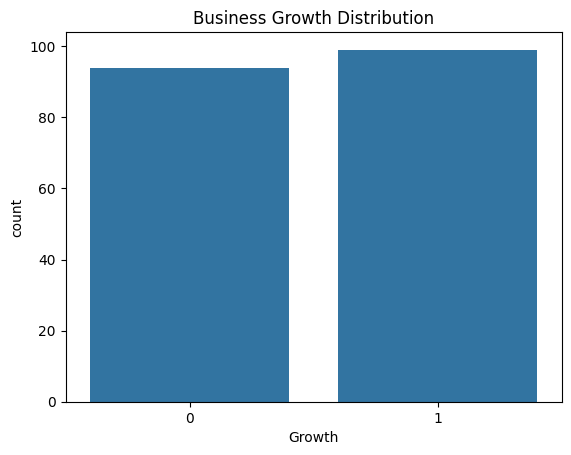

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Growth", data=df)
plt.title("Business Growth Distribution")
plt.show()


## Correlation Heatmap
This heatmap shows relationships between digital tools usage and business growth.
It helps identify which digital factors impact business growth the most.


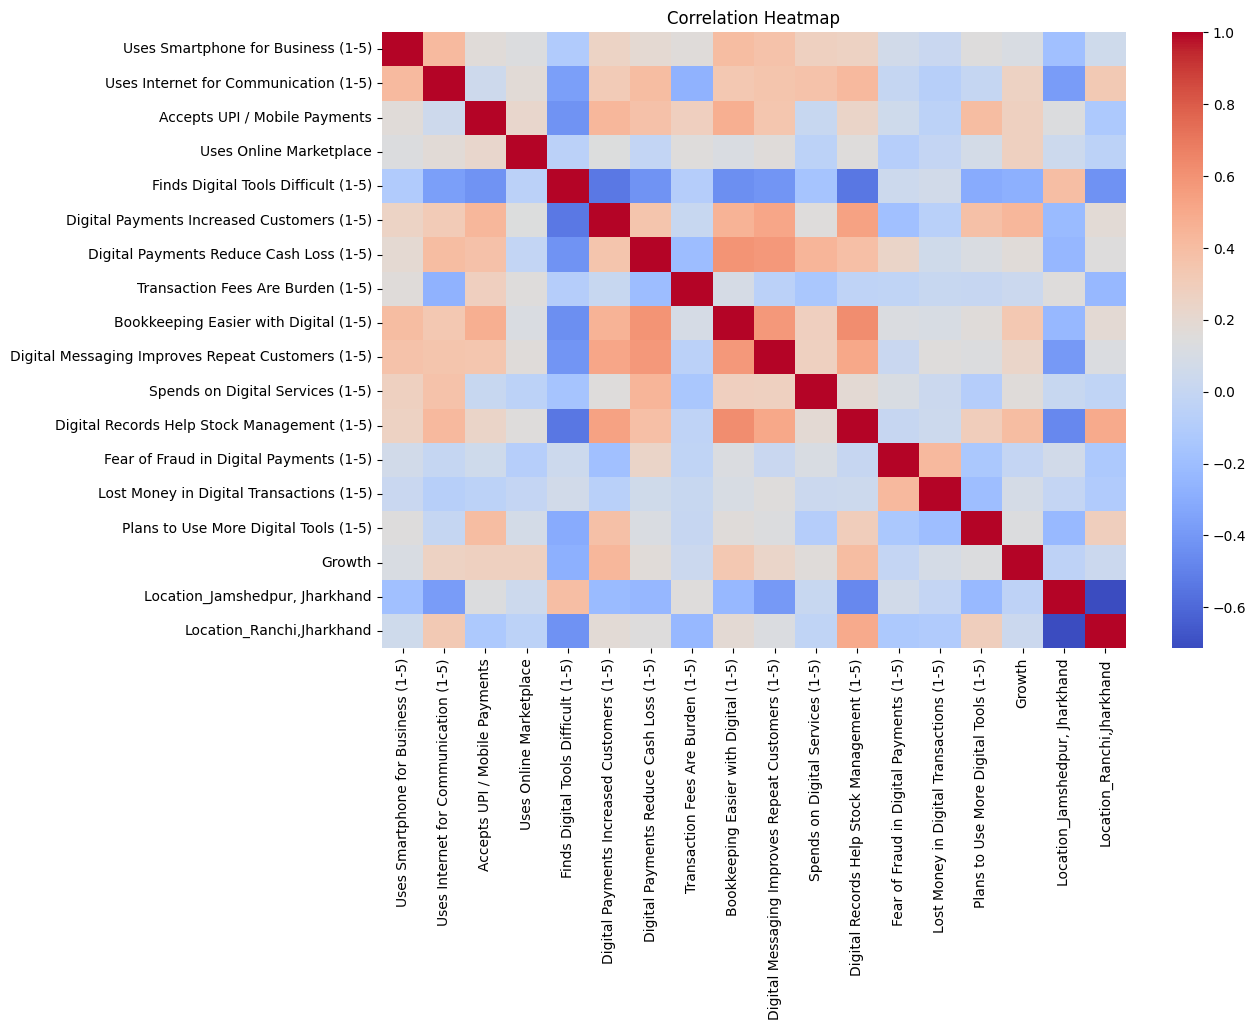

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [41]:
df.corr()["Growth"].sort_values(ascending=False)


Growth                                               1.000000
Digital Payments Increased Customers (1-5)           0.431320
Digital Records Help Stock Management (1-5)          0.402316
Bookkeeping Easier with Digital (1-5)                0.337210
Uses Online Marketplace                              0.272864
Accepts UPI / Mobile Payments                        0.272401
Uses Internet for Communication (1-5)                0.261583
Digital Messaging Improves Repeat Customers (1-5)    0.233668
Digital Payments Reduce Cash Loss (1-5)              0.168596
Spends on Digital Services (1-5)                     0.159850
Plans to Use More Digital Tools (1-5)                0.129969
Uses Smartphone for Business (1-5)                   0.112873
Lost Money in Digital Transactions (1-5)             0.085043
Transaction Fees Are Burden (1-5)                    0.036094
Location_Ranchi,Jharkhand                            0.035365
Fear of Fraud in Digital Payments (1-5)             -0.005553
Location

# Machine Learning Model

After analyzing the dataset, machine learning models are applied to predict
whether a business experiences growth due to digitalization.

We use classification algorithms such as Logistic Regression to predict
business growth based on digital adoption features.


In [42]:
# Features (everything except Growth)
X = df.drop("Growth", axis=1)

# Target
y = df["Growth"]

print(X.shape)
print(y.shape)


(193, 17)
(193,)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (154, 17)
Test size: (39, 17)


### Markdown BEFORE Logistic Regression
## Model 1: Logistic Regression
Logistic Regression is a supervised machine learning algorithm used for binary classification problems.
In this project, it is used to predict whether a small business experienced growth due to digitalization.

The model analyzes various digital adoption factors such as:
* Use of smartphones for business
* Online payments (UPI/mobile payments)
* Online marketplaces
* Digital bookkeeping and messaging
* Digital records and stock management
These features help determine whether digital tools contribute to business growth.

Logistic Regression is chosen as a baseline model because:
* It is simple and easy to interpret
* Works well for binary outcomes (Growth vs No Growth)
* Helps understand relationship between digitalization and growth

The dataset is divided into training and testing sets, and the model is trained on the training data and evaluated on unseen test data.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Accuracy: 0.6923076923076923
[[14  4]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        18
           1       0.76      0.62      0.68        21

    accuracy                           0.69        39
   macro avg       0.70      0.70      0.69        39
weighted avg       0.71      0.69      0.69        39



# Logistic Regression Results
The Logistic Regression model was trained to predict whether a business experienced growth due to digitalization.

The model achieved an accuracy of 69% on the test dataset, indicating a moderate relationship between digital adoption and business growth.

The confusion matrix shows that the model is able to reasonably classify both growth and non-growth businesses, though some misclassifications exist due to the subjective nature of survey responses.

Overall, the Logistic Regression model demonstrates that digital tools such as online payments, communication, and record management have a measurable impact on small business growth.

### Model 2: Random Forest
Random Forest is an ensemble machine learning algorithm used for classification and prediction. It builds multiple decision trees and combines them to produce more accurate and stable results.

It is used in this project to predict whether digitalization leads to business growth. Random Forest is chosen because it can capture complex relationships between multiple digital adoption factors and business performance.

This model also helps identify the most important features influencing business growth.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8461538461538461
[[16  2]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.89      0.81      0.85        21

    accuracy                           0.85        39
   macro avg       0.85      0.85      0.85        39
weighted avg       0.85      0.85      0.85        39



### Random Forest Results
The Random Forest model was trained to predict business growth based on digitalization-related features.

The model achieved an accuracy of 84.6%, which is significantly higher than the Logistic Regression model. This indicates that Random Forest is better at capturing complex relationships between digital adoption and business growth.

The confusion matrix and classification report show that the model performs well in predicting both growth and non-growth businesses with high precision and recall.

Overall, the Random Forest model provides a more accurate prediction of business growth and suggests that digital payments, online communication, and digital record management strongly influence small business performance.

### Model Comparison and Final Conclusion
Two machine learning models were applied to predict business growth:
* Logistic Regression Accuracy: 69%
* Random Forest Accuracy: 84.6%

The Random Forest model outperformed Logistic Regression and provided more accurate predictions.

This suggests that the relationship between digitalization and business growth is complex and influenced by multiple factors such as digital payments, bookkeeping, online communication, and digital record management.

Therefore, Random Forest is selected as the final model for predicting business growth due to digitalization.

The results indicate that digital adoption has a significant positive impact on small business growth.

### Sample data
### Model Testing on New Business Data
To evaluate real-world usability, the trained Random Forest model was tested on a sample business input.

The model analyzed digital adoption features such as UPI usage, online communication, digital bookkeeping, and digital payments.

In [46]:
new_shop = [[
    5,  # Uses smartphone
    4,  # Uses internet
    1,  # Accepts UPI
    1,  # Uses online marketplace
    2,  # Finds digital tools difficult
    5,  # Digital payments increased customers
    4,  # Reduce cash loss
    3,  # Transaction fee burden
    5,  # Bookkeeping easier
    4,  # Messaging improves repeat customers
    3,  # Spends on digital services
    4,  # Records help stock
    2,  # Fear of fraud
    1,  # Lost money before
    5,  # Plans to use more digital tools
    0,  # Location_Jamshedpur
    1   # Location_Ranchi
]]


In [48]:
prediction = rf_model.predict(new_shop)

if prediction[0] == 1:
    print("Business will likely see GROWTH due to digitalization 📈")
else:
    print("Business may NOT see significant growth 📉")


Business will likely see GROWTH due to digitalization 📈


c:\Users\KIIT0001\OneDrive\Desktop\Minor_project\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
prob = rf_model.predict_proba(new_shop)
print("Growth probability:", prob)


Growth probability: [[0.38 0.62]]


c:\Users\KIIT0001\OneDrive\Desktop\Minor_project\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Prediction Result:
The model predicted that the business is likely to experience growth due to digitalization.
### Probability Output:
The model estimated:
* 62% probability of business growth
* 38% probability of no significant growth
This demonstrates that the machine learning model can be used to predict whether small businesses will benefit from adopting digital tools.

Overall, the model shows strong potential for helping small businesses make data-driven digital decisions.